<a href="https://colab.research.google.com/github/Madhav2204/Object-Detection-System-Using-YOLO3/blob/main/Object_detection_using_YOLO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2022-05-03 05:44:31--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.2’

yolov3.cfg.2        100%[===================>]   8.15K  --.-KB/s    in 0s      

2022-05-03 05:44:32 (77.2 MB/s) - ‘yolov3.cfg.2’ saved [8342/8342]



In [3]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2022-05-03 05:44:34--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names.1’

coco.names.1        100%[===================>]     625  --.-KB/s    in 0s      

2022-05-03 05:44:34 (22.5 MB/s) - ‘coco.names.1’ saved [625/625]



In [4]:
# Load Yolo
# path =r"D:\yolov3-coco"
weight = "/content/drive/MyDrive/yolov3.weights"
cfg = "/content/yolov3.cfg"
names = '/content/coco.names'

In [5]:
# Load Yolo
print("LOADING YOLO")
net = cv2.dnn.readNet(weight, cfg)
#save all the names in file o the list classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#get layers of the network
layer_names = net.getLayerNames()
#Determine the output layer names from the YOLO model 
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

LOADING YOLO
YOLO LOADED


In [6]:
 # Capture frame-by-frame
img = cv2.imread("/content/drive/MyDrive/test_img.jpg")

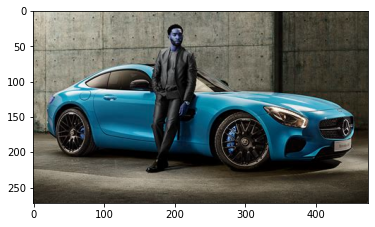

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [8]:
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [9]:
print('-------------Image Configuration-----------')
print('Height - ',height,'\nWidth - ',width, '\nchannels - ',channels )

-------------Image Configuration-----------
Height -  109 
Width -  190 
channels -  3


In [10]:
# USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),swapRB=True, crop=False)

In [11]:
# Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)

In [12]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

-1

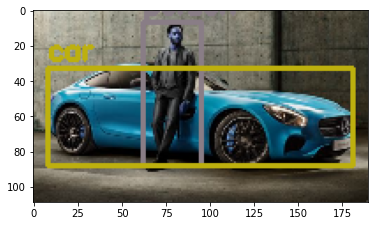

In [13]:
#We use NMS function in opencv to perform Non-maximum Suppression
#we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,1/2, color, 2)


plt.imshow(img)
cv2.waitKey(0)